In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams["figure.figsize"] = (15,8) #set size of plot
plt.rcParams.update({'font.size': 22})

In [3]:
os.chdir('/home/MA')

**PV production calculation**

Methodology based on this paper: https://www.researchgate.net/publication/331837767_The_energetic_implications_of_introducing_lithium-ion_batteries_into_distributed_photovoltaic_systems

Get local data from https://re.jrc.ec.europa.eu/pvg_tools/en/#HR
for years 2010-2016 to average yearly variability
Solar panels were assumed to be 46 inclined towards south to maximize yearly yield without the need for sophisticated mechanic installations.

Read data into dataframe

In [4]:
meteo_data = pd.read_csv('Data/timeseries_ZRH.csv')

In [5]:
meteo_data.head()

,time,G(i),H_sun,T2m,WS10m,Int
0,20100101:0010,0.0,0.0,-0.26,0.37,0
1,20100101:0110,0.0,0.0,-0.01,0.48,0
2,20100101:0210,0.0,0.0,0.25,0.58,0
3,20100101:0310,0.0,0.0,0.50,0.69,0
4,20100101:0410,0.0,0.0,0.21,0.76,0


Convert time column to datetime format to facilitate data processing

In [6]:
meteo_data['time'] = pd.to_datetime(meteo_data['time'], format='%Y%m%d:%H%M')

Get rid of leap years

In [7]:
meteo_data = meteo_data[~((meteo_data.time.dt.month == 2) & (meteo_data.time.dt.day == 29))]

Check length of dataset to be 7 years x 365 days/year x 24 hours/day = 61320 days

In [8]:
len(meteo_data)

61320

Check date of maximum value

In [9]:
meteo_data[meteo_data['G(i)'] == meteo_data['G(i)'].max()]

,time,G(i),H_sun,T2m,WS10m,Int
28236,2013-03-22 12:10:00,1110.61,42.48,11.17,3.6,0


This is the absolute amount of radiation incident on a solar cell in Zurich without accounting for the conversion efficiency. 
As expected, it occurs on the 22th of March, the date where the sun's angle is exactly perpendicular to the panel's orientation.

Calculate hourly averages over the defined period of years by grouping and taking the mean.

In [10]:
hourly_average=meteo_data.groupby([meteo_data["time"].dt.month, meteo_data["time"].dt.day, meteo_data["time"].dt.hour]).mean()

In [11]:
hourly_average.index.names = ["month", "day", "hour"]

Define conversion efficiency

In [12]:
conv_eff = 0.2 # 2020 slide 7 on https://www.ise.fraunhofer.de/content/dam/ise/de/documents/publications/studies/Photovoltaics-Report.pdf

Calculate power production

In [13]:
hourly_average['Prod/m2'] = hourly_average['G(i)']*conv_eff/1000
hourly_average.head(24)

G(i)      H_sun       T2m     WS10m       Int   Prod/m2
month day hour                                                               
1     1   0       0.000000   0.000000  0.280000  1.917143  0.000000  0.000000
          1       0.000000   0.000000  0.271429  1.812857  0.000000  0.000000
          2       0.000000   0.000000  0.260000  1.708571  0.000000  0.000000
          3       0.000000   0.000000  0.244286  1.605714  0.000000  0.000000
          4       0.000000   0.000000  0.055714  1.535714  0.000000  0.000000
          5       0.000000   0.000000 -0.134286  1.465714  0.000000  0.000000
          6       0.000000   0.000000 -0.322857  1.395714  0.000000  0.000000
          7       0.000000   0.000000  0.215714  1.468571  0.000000  0.000000
          8      73.598571   6.610000  0.757143  1.544286  0.142857  0.014720
          9     135.368571  12.950000  1.295714  1.620000  0.142857  0.027074
          10    150.588571  14.871429  2.375714  1.680000  0.000000  0.030118
          11    202.564286  16.637143  3.451429  1.740000  0.000000  0.040513
          12    163.107143  16.217143  4.534286  1.801429  0.000000  0.032621
          13    161.694286  13.645714  4.440000  1.637143  0.000000  0.032339
          14    121.412857  10.730000  4.348571  1.475714  0.142857  0.024283
          15     40.572857   3.760000  4.254286  1.310000  0.142857  0.008115
          16      0.000000   0.000000  3.575714  1.577143  0.000000  0.000000
          17      0.000000   0.000000  2.897143  1.840000  0.000000  0.000000
          18      0.000000   0.000000  2.218571  2.105714  0.000000  0.000000
          19      0.000000   0.000000  1.917143  2.308571  0.000000  0.000000
          20      0.000000   0.000000  1.618571  2.510000  0.000000  0.000000
          21      0.000000   0.000000  1.317143  2.714286  0.000000  0.000000
          22      0.000000   0.000000  1.091429  2.637143  0.000000  0.000000
          23      0.000000   0.000000  0.861429  2.560000  0.000000  0.000000

Define PV sizing **HERE**

In [14]:
PV_size = 6 #kW_p

According to https://www.energieheld.de/solaranlage/photovoltaik and https://www.energieheld.ch/solaranlagen/photovoltaik#:~:text=Rechnen%20Sie%20im%20Durchschnitt%20etwa,dieser%20Gr%C3%B6sse%20installieren%20zu%20k%C3%B6nnen, 6 m2 are required per kW_p

In [15]:
size = 6*PV_size # m2 necessary for 6 kW_p

In [16]:
hourly_average['Prod'] = hourly_average['Prod/m2']*size

In [17]:
import matplotlib.dates as mdates

In [18]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

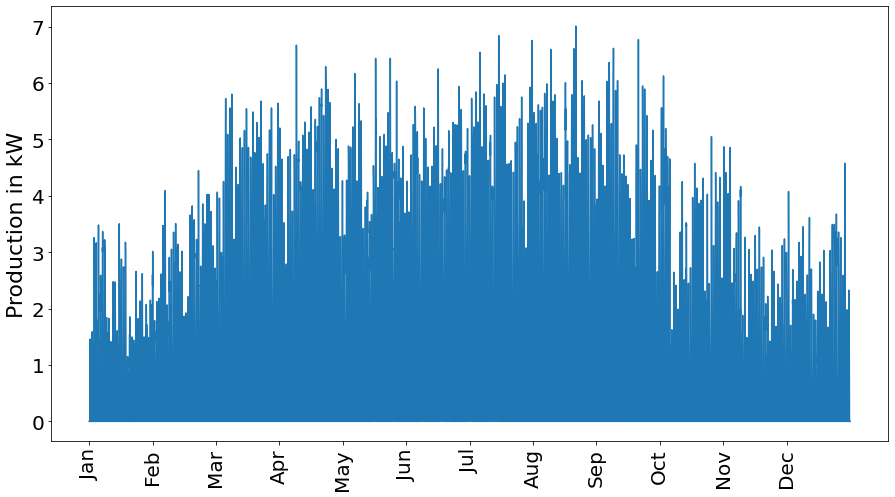

In [25]:
ax = hourly_average['Prod'].plot(fontsize = 20, ylabel = 'Production in kW', xlabel ='');
ax.set_xticks(np.arange(0, 8760, 730).tolist());
ax.set_xticklabels(months, rotation=90);

In [20]:
fig = ax.get_figure()

In [21]:
fig.savefig('Plots/Solar_CH.jpg')

Calculate yearly production

In [22]:
yearly_PV_prod = hourly_average['Prod'].sum()

In [23]:
yearly_PV_prod

10113.988515428571

In [24]:
hourly_average['Prod'].to_pickle('Calculations/CH/PV_production_CH.pkl')